In [32]:
# Packages, plotting parameters, and folder to save/read data
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import csv 
import seaborn as sns
from scipy import ndimage
from scipy.signal import savgol_filter
# Update plotting parameters
params = {'legend.fontsize': 'xx-large',         
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
          'font.sans-serif': "Arial",
          'font.family': "sans-serif",
          'figure.figsize': (6, 6),
         }
sns.set_style("whitegrid", {'axes.grid' : False})
plt.rcParams.update(params)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.rcParams.update(params)
font = {'family' : 'sans-serif',
        'size'   : 14}
mpl.rc('font', **font)

# Folder data 
data_folder = "./2021_July30_FIB2_50microns/"
fig_folder = "figs/July30_figs/"

In [35]:
# Reads image data and associated line cuts, calculating scintillation enhancement on/off sample
def read_data(file, plot_flag = True, plot_window = ([0,1014],[0,1014])):
    # Reads correlated .csv and image data 
    file0 = data_folder + file
    try:
        img = mpimg.imread(file0 + ".jpg")
        img = np.squeeze(img)
    except FileNotFoundError: 
        img = mpimg.imread(file0 + ".png")
        img = np.squeeze(img[:,:,0])
    pixels, cut, pixels_bg, cut_bg = [], [], [], []
    with open(file0 + '.csv','r') as csvfile: 
        reader = csv.reader(csvfile, delimiter=',', quotechar='|') 
        for row in reader:
            pixels.append(float(row[0]))
            cut.append(float(row[1]))
        pixels = np.array(pixels)
        cut = np.array(cut)
    try:
        with open(file0 + '_Off.csv','r') as csvfile: 
            reader = csv.reader(csvfile, delimiter=',', quotechar='|') 
            for row in reader:
                pixels_bg.append(float(row[0]))
                cut_bg.append(float(row[1]))
            pixels_bg = np.array(pixels_bg)
            cut_bg = np.array(cut_bg)   
    except FileNotFoundError:
        pixels_bg = pixels
        cut_bg = np.ones_like(cut)
    diffcut_smooth = np.diff(savgol_filter(cut,7,1))
    (lp, rp) = (np.where(diffcut_smooth == np.max(diffcut_smooth))[0][0], np.where(diffcut_smooth == np.min(diffcut_smooth))[0][0])
    on_square = np.mean(cut[lp:rp])
    off_square = (np.mean(cut[:lp])+np.mean(cut[rp:]))/2.0
    background = np.mean(cut_bg) 
    print(file)
    print("Enhancement (no bg sub.) : {0} vs. {1} = {2} ({3} %)".format(on_square, off_square, on_square/off_square, (on_square-off_square)/off_square*100.))
    if background > off_square:
        print("Careful! Background is larger than signal.")
    else:
        print("Enhancement : {0} vs. {1} = {2} ({3} %)".format(on_square-background, off_square-background, (on_square-background)/(off_square-background), (on_square-off_square)/(off_square-background)*100.))
    if plot_flag:
        fig, axs = plt.subplots(1, 2, figsize = (15, 5))
        implot = axs[1].imshow(img[plot_window[1][0]:plot_window[1][1],plot_window[0][0]:plot_window[0][1]], cmap = "inferno")
        axs[1].axis('off')
        axs[1].set_title(file)        
        fig.colorbar(implot)
        axs[0].plot(pixels, cut, label = "signal")
        axs[0].plot(pixels[lp:rp], cut[lp:rp], 'x', label = "on square")
        axs[0].set_xlabel("Pixel index")
        axs[0].set_xticks([0,np.max(pixels)])        
        axs[0].plot(pixels_bg, cut_bg, label = "bg")
        axs[0].legend()        
        # plt.savefig(fig_folder+file+".svg")
    return img, pixels, cut, pixels_bg, cut_bg, on_square, off_square, background

# Experimental data, Figure 5, from July 30th (50 microns sample, X-ray images)

FF01-549-15-25_50microns_A2_Air
Enhancement (no bg sub.) : 1202.6732974683541 vs. 693.1566409999999 = 1.7350671209516035 (73.50671209516035 %)
Enhancement : 840.8888944380511 vs. 331.3722379696969 = 2.5375960870776026 (153.75960870776026 %)
FF01-549-15-25_50microns_A12_Air
Enhancement (no bg sub.) : 1068.9230443037975 vs. 662.9710675324676 = 1.6123223118653656 (61.232231186536545 %)
Enhancement : 704.8322076646791 vs. 298.88023089334916 = 2.3582429843484287 (135.82429843484283 %)
FF01-549-15-25_50microns_A2_LE1
Enhancement (no bg sub.) : 709.656910625 vs. 342.28881274944564 = 2.0732693684162755 (107.32693684162757 %)
Enhancement : 561.7969847562742 vs. 194.4288868807198 = 2.889472823556981 (188.94728235569804 %)
FF01-549-15-25_50microns_A12_LE1
Enhancement (no bg sub.) : 601.7965571428571 vs. 328.9327565476191 = 1.8295428021798004 (82.95428021798004 %)
Enhancement : 452.03576718146707 vs. 179.17196658622908 = 2.522915698220672 (152.29156982206723 %)
FF01-549-15-25_50microns_A2_HE6
Enha

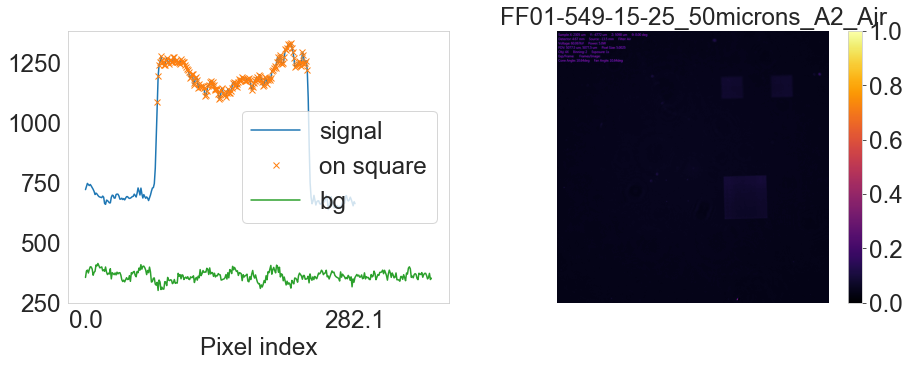

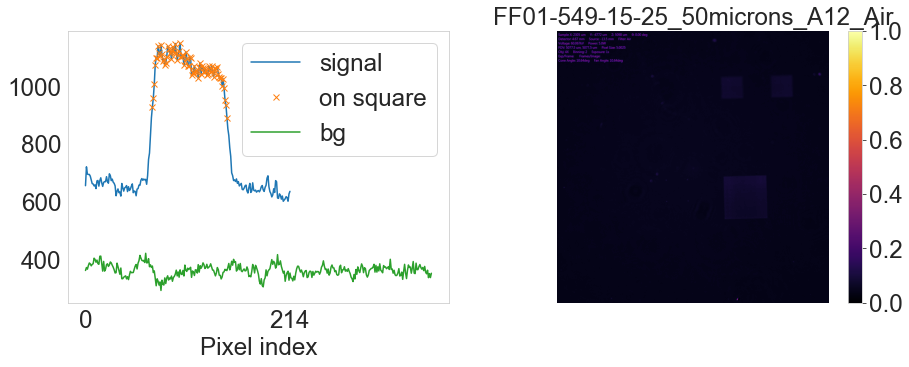

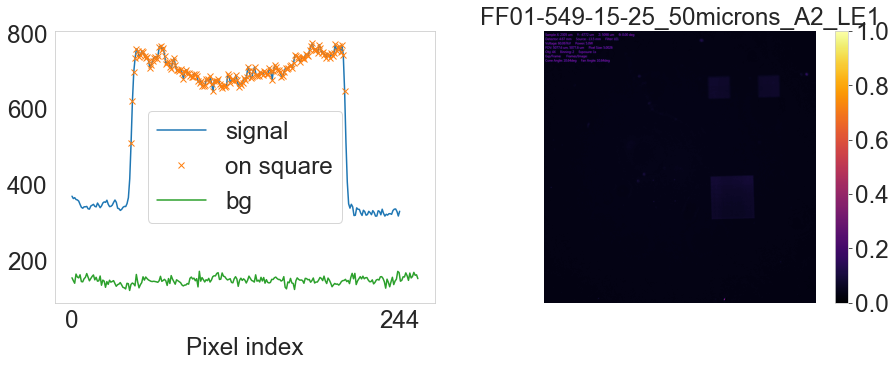

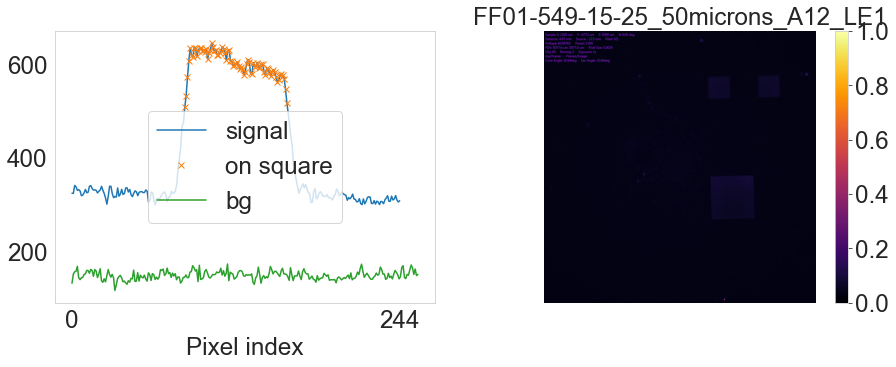

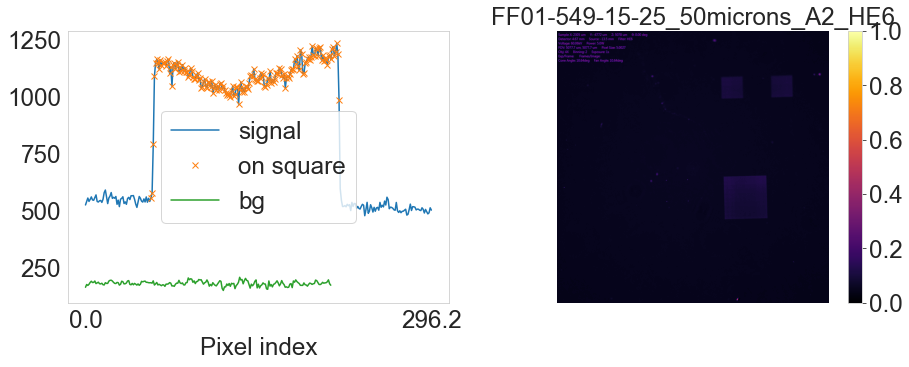

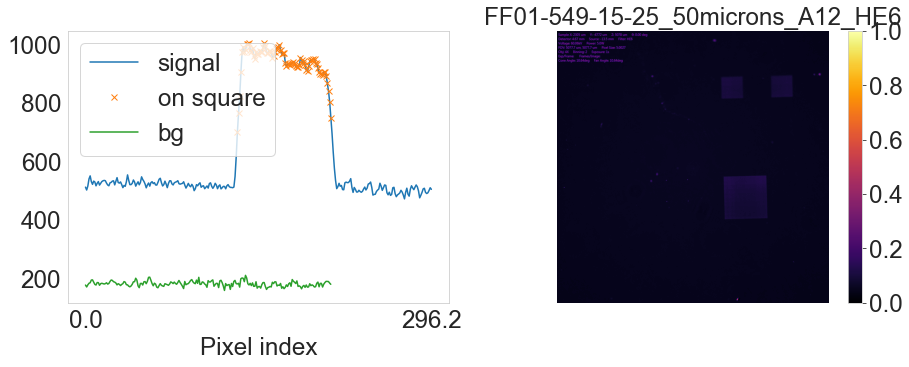

In [36]:
# Extracts enhancement from line cuts 
# No X-ray filter
img, pixels, cut, pixels_bg, cut_bg, on_square, off_square, background = read_data("FF01-549-15-25_50microns_A2_Air");
imgref = img
img, pixels, cut, pixels_bg, cut_bg, on_square, off_square, background = read_data("FF01-549-15-25_50microns_A12_Air");

# LE1 X-ray filter
img, pixels, cut, pixels_bg, cut_bg, on_square, off_square, background = read_data("FF01-549-15-25_50microns_A2_LE1");
img, pixels, cut, pixels_bg, cut_bg, on_square, off_square, background = read_data("FF01-549-15-25_50microns_A12_LE1");

# HE6 X-ray filter
img, pixels, cut, pixels_bg, cut_bg, on_square, off_square, background = read_data("FF01-549-15-25_50microns_A2_HE6");
img, pixels, cut, pixels_bg, cut_bg, on_square, off_square, background = read_data("FF01-549-15-25_50microns_A12_HE6");

Image shape (310, 310)


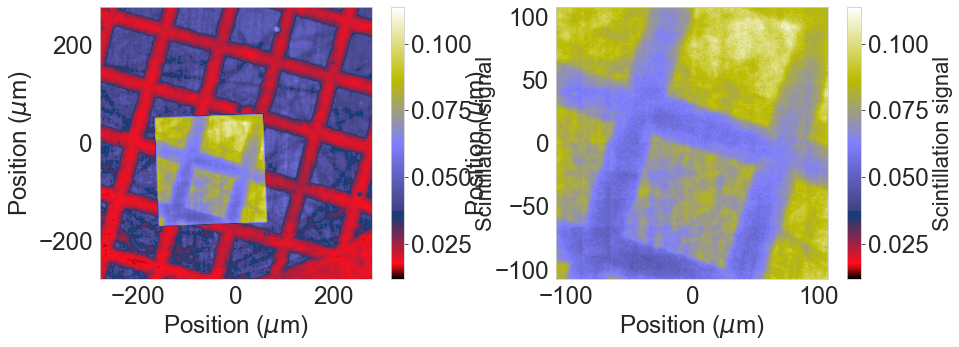

In [37]:
## TEM GRID IMAGE 
img = mpimg.imread(data_folder+"FF01-549-15-25_50microns_TEMGrid_Long.png")
img = np.squeeze(img[:,:,0])

image = img[400:1200,600:1400]
rotang = -2
rotated = ndimage.rotate(image, rotang)
rotated_image = rotated[335:645,180:490]

## Geometrical magnification.
source_to_object = 8. #mm
object_to_scint = 8. #mm
mag = 1.0 + object_to_scint / source_to_object
scint_real_size = 430. # microns 

(pixx_rot, pixy_rot) = ((scint_real_size/mag)/np.shape(rotated_image)[0],(scint_real_size/mag)/np.shape(rotated_image)[1])
(pixx, pixy) = (pixx_rot/np.cos(rotang*np.pi/180.), pixy_rot/np.cos(rotang*np.pi/180.))
-pixx/2.*np.shape(image)[0]

fig, axs = plt.subplots(1, 2, figsize = (15, 5))
implot = axs[0].imshow(image, extent = [-pixx/2.*np.shape(image)[0], pixx/2.*np.shape(image)[0], -pixy/2.*np.shape(image)[1], pixy/2.*np.shape(image)[1]], cmap = "gist_stern")
axs[0].set_xlabel("Position ($\mu$m)")
axs[0].set_ylabel("Position ($\mu$m)")
cbar = fig.colorbar(implot, ax = axs[0])
cbar.set_label('Scintillation signal',size=22)
implot = axs[1].imshow(rotated_image, extent = [-pixx_rot/2.*np.shape(rotated_image)[0], pixx_rot/2.*np.shape(rotated_image)[0], -pixy_rot/2.*np.shape(rotated_image)[1], pixy_rot/2.*np.shape(rotated_image)[1]], 
                       cmap = "gist_stern", vmin = np.min(image.flatten()), vmax = np.max(image.flatten()))
axs[1].set_xlabel("Position ($\mu$m)")
axs[1].set_ylabel("Position ($\mu$m)")
cbar = fig.colorbar(implot, ax = axs[1])
cbar.set_label('Scintillation signal',size=22)
# plt.savefig(fig_folder+'temgrid_long.svg') 
print("Image shape {}".format(np.shape(rotated_image)))
tem_image = rotated_image/np.max(np.max(rotated_image))
extent_tem = extent = [-pixx_rot/2.*np.shape(rotated_image)[0], pixx_rot/2.*np.shape(rotated_image)[0], -pixy_rot/2.*np.shape(rotated_image)[1], pixy_rot/2.*np.shape(rotated_image)[1]]

Image shape (310, 310)


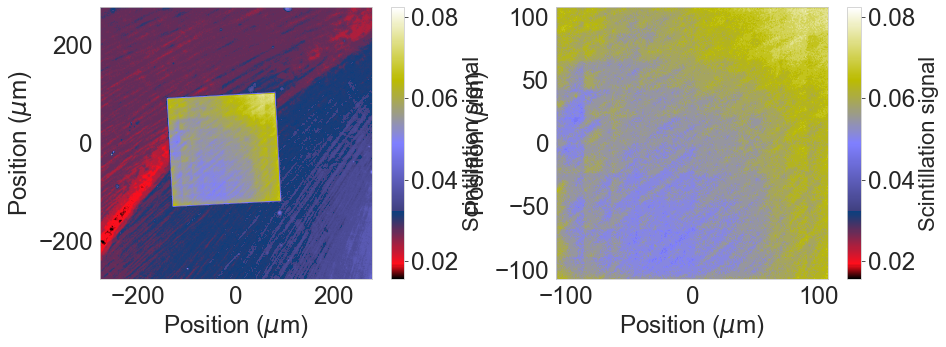

In [38]:
# Flower bud image
img = mpimg.imread(data_folder+"FF01-549-15-25_50microns_FlowerBud_Long.png")
img = np.squeeze(img[:,:,0])

image = img[400:1200,200:1000]
rotang = -3
rotated = ndimage.rotate(image, rotang)
rotated_image = rotated[280:590,225:535]

## Geometrical magnification.
source_to_object = 8. #mm
object_to_scint = 8. #mm
mag = 1.0 + object_to_scint / source_to_object
scint_real_size = 430. # microns 

(pixx_rot, pixy_rot) = ((scint_real_size/mag)/np.shape(rotated_image)[0],(scint_real_size/mag)/np.shape(rotated_image)[1])
(pixx, pixy) = (pixx_rot/np.cos(rotang*np.pi/180.), pixy_rot/np.cos(rotang*np.pi/180.))
-pixx/2.*np.shape(image)[0]

fig, axs = plt.subplots(1, 2, figsize = (15, 5))
implot = axs[0].imshow(image, extent = [-pixx/2.*np.shape(image)[0], pixx/2.*np.shape(image)[0], -pixy/2.*np.shape(image)[1], pixy/2.*np.shape(image)[1]], cmap = "gist_stern")
axs[0].set_xlabel("Position ($\mu$m)")
axs[0].set_ylabel("Position ($\mu$m)")
cbar = fig.colorbar(implot, ax = axs[0])
cbar.set_label('Scintillation signal',size=22)
implot = axs[1].imshow(rotated_image, extent = [-pixx_rot/2.*np.shape(rotated_image)[0], pixx_rot/2.*np.shape(rotated_image)[0], -pixy_rot/2.*np.shape(rotated_image)[1], pixy_rot/2.*np.shape(rotated_image)[1]], 
                       cmap = "gist_stern", vmin = np.min(image.flatten()), vmax = np.max(image.flatten()))
axs[1].set_xlabel("Position ($\mu$m)")
axs[1].set_ylabel("Position ($\mu$m)")
cbar = fig.colorbar(implot, ax = axs[1])
cbar.set_label('Scintillation signal',size=22)
# plt.savefig(fig_folder+'bud.svg') 
print("Image shape {}".format(np.shape(rotated_image)))
bud_image = rotated_image/np.max(np.max(rotated_image))
extent_bud = [-pixx_rot/2.*np.shape(rotated_image)[0], pixx_rot/2.*np.shape(rotated_image)[0], -pixy_rot/2.*np.shape(rotated_image)[1], pixy_rot/2.*np.shape(rotated_image)[1]]

Image shape (155, 155)
Reference Image shape (310, 310)


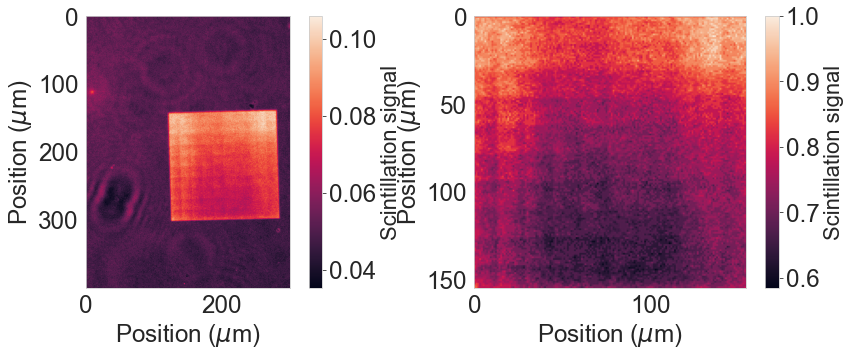

In [39]:
# FLATFIELD IMAGE FOR FLATFIELD CORRECTION (taken without specimen)
image = imgref[400:800,500:800]
rotang = -1.5
rotated = ndimage.rotate(image, rotang)
rotated_image = rotated[147:302,130:285]

## Geometrical magnification.
source_to_object = 8. #mm
object_to_scint = 8. #mm
mag = 1.0 + object_to_scint / source_to_object
scint_real_size = 430. # microns 

(pixx_rot, pixy_rot) = ((scint_real_size/mag)/np.shape(rotated_image)[0],(scint_real_size/mag)/np.shape(rotated_image)[1])
(pixx, pixy) = (pixx_rot/np.cos(rotang*np.pi/180.), pixy_rot/np.cos(rotang*np.pi/180.))
-pixx/2.*np.shape(image)[0]

fig, axs = plt.subplots(1, 2, figsize = (15, 5))
implot = axs[0].imshow(image)
axs[0].set_xlabel("Position ($\mu$m)")
axs[0].set_ylabel("Position ($\mu$m)")
cbar = fig.colorbar(implot, ax = axs[0])
cbar.set_label('Scintillation signal',size=22)
implot = axs[1].imshow(rotated_image/np.max(np.max(rotated_image)))
axs[1].set_xlabel("Position ($\mu$m)")
axs[1].set_ylabel("Position ($\mu$m)")
cbar = fig.colorbar(implot, ax = axs[1])
cbar.set_label('Scintillation signal',size=22)
print("Image shape {}".format(np.shape(rotated_image)))

background_image = np.repeat(np.repeat(rotated_image/np.max(np.max(rotated_image)), 2, axis = 0),2, axis = 1)
print("Reference Image shape {}".format(np.shape(background_image)))

Image shape (155, 155)
Image shape (155, 155)


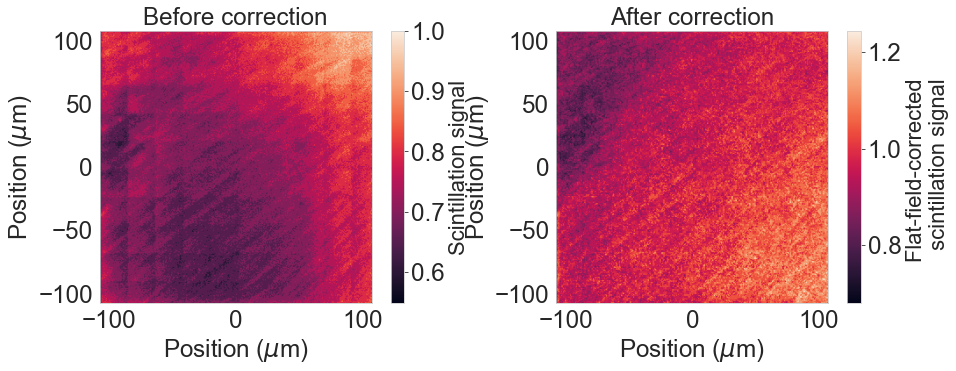

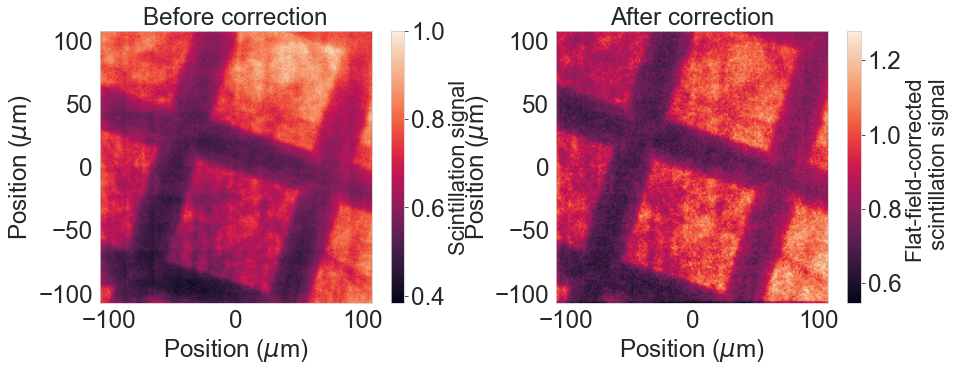

In [40]:
## Flatfield correction
bud_image_corrected = bud_image / np.roll(background_image, 4, axis = 1)
tem_image_corrected = tem_image / np.roll(np.roll(background_image, 4, axis = 1), -2, axis = 0)

fig, axs = plt.subplots(1, 2, figsize = (15, 5))
implot = axs[0].imshow(bud_image, extent = extent_bud)
axs[0].set_xlabel("Position ($\mu$m)")
axs[0].set_ylabel("Position ($\mu$m)")
axs[0].set_title("Before correction")
cbar = fig.colorbar(implot, ax = axs[0])
cbar.set_label('Scintillation signal',size=22)
implot = axs[1].imshow(bud_image_corrected, extent = extent_bud)
axs[1].set_xlabel("Position ($\mu$m)")
axs[1].set_ylabel("Position ($\mu$m)")
axs[1].set_title("After correction")
cbar = fig.colorbar(implot, ax = axs[1])
cbar.set_label('Flat-field-corrected \n scintillation signal',size=22)
print("Image shape {}".format(np.shape(rotated_image)))
# plt.savefig(fig_folder+'bud_corrected.svg')

fig, axs = plt.subplots(1, 2, figsize = (15, 5))
implot = axs[0].imshow(tem_image, extent = extent_tem)
axs[0].set_xlabel("Position ($\mu$m)")
axs[0].set_ylabel("Position ($\mu$m)")
axs[0].set_title("Before correction")
cbar = fig.colorbar(implot, ax = axs[0])
cbar.set_label('Scintillation signal',size=22)
implot = axs[1].imshow(tem_image_corrected, extent = extent_tem)
axs[1].set_xlabel("Position ($\mu$m)")
axs[1].set_ylabel("Position ($\mu$m)")
axs[1].set_title("After correction")
cbar = fig.colorbar(implot, ax = axs[1])
cbar.set_label('Flat-field-corrected \n scintillation signal',size=22)
print("Image shape {}".format(np.shape(rotated_image)))
# plt.savefig(fig_folder+'tem_corrected.svg')